In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%config IPCompleter.greedy=True
mpath='../src/datasets/boston'
pfile='Boston.csv'
src1=mpath+'/'+pfile
df=pd.read_csv(src1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
colnames=df.columns.values.tolist()
predictors=colnames[:13]
target=colnames[13]
X=df[predictors]
Y=df[target]

In [72]:
from sklearn.tree import DecisionTreeRegressor
regtree=DecisionTreeRegressor (min_samples_split=30, min_samples_leaf=10, random_state=0)


In [73]:
regtree.fit(X,Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [74]:
preds=regtree.predict(data[predictors])

In [75]:
df['preds']=preds

In [76]:
df[['preds', 'medv']]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


In [77]:
from sklearn.tree import export_graphviz
import os 
from graphviz import Source
with open('../src/resources/boston/boston.dot', "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
    

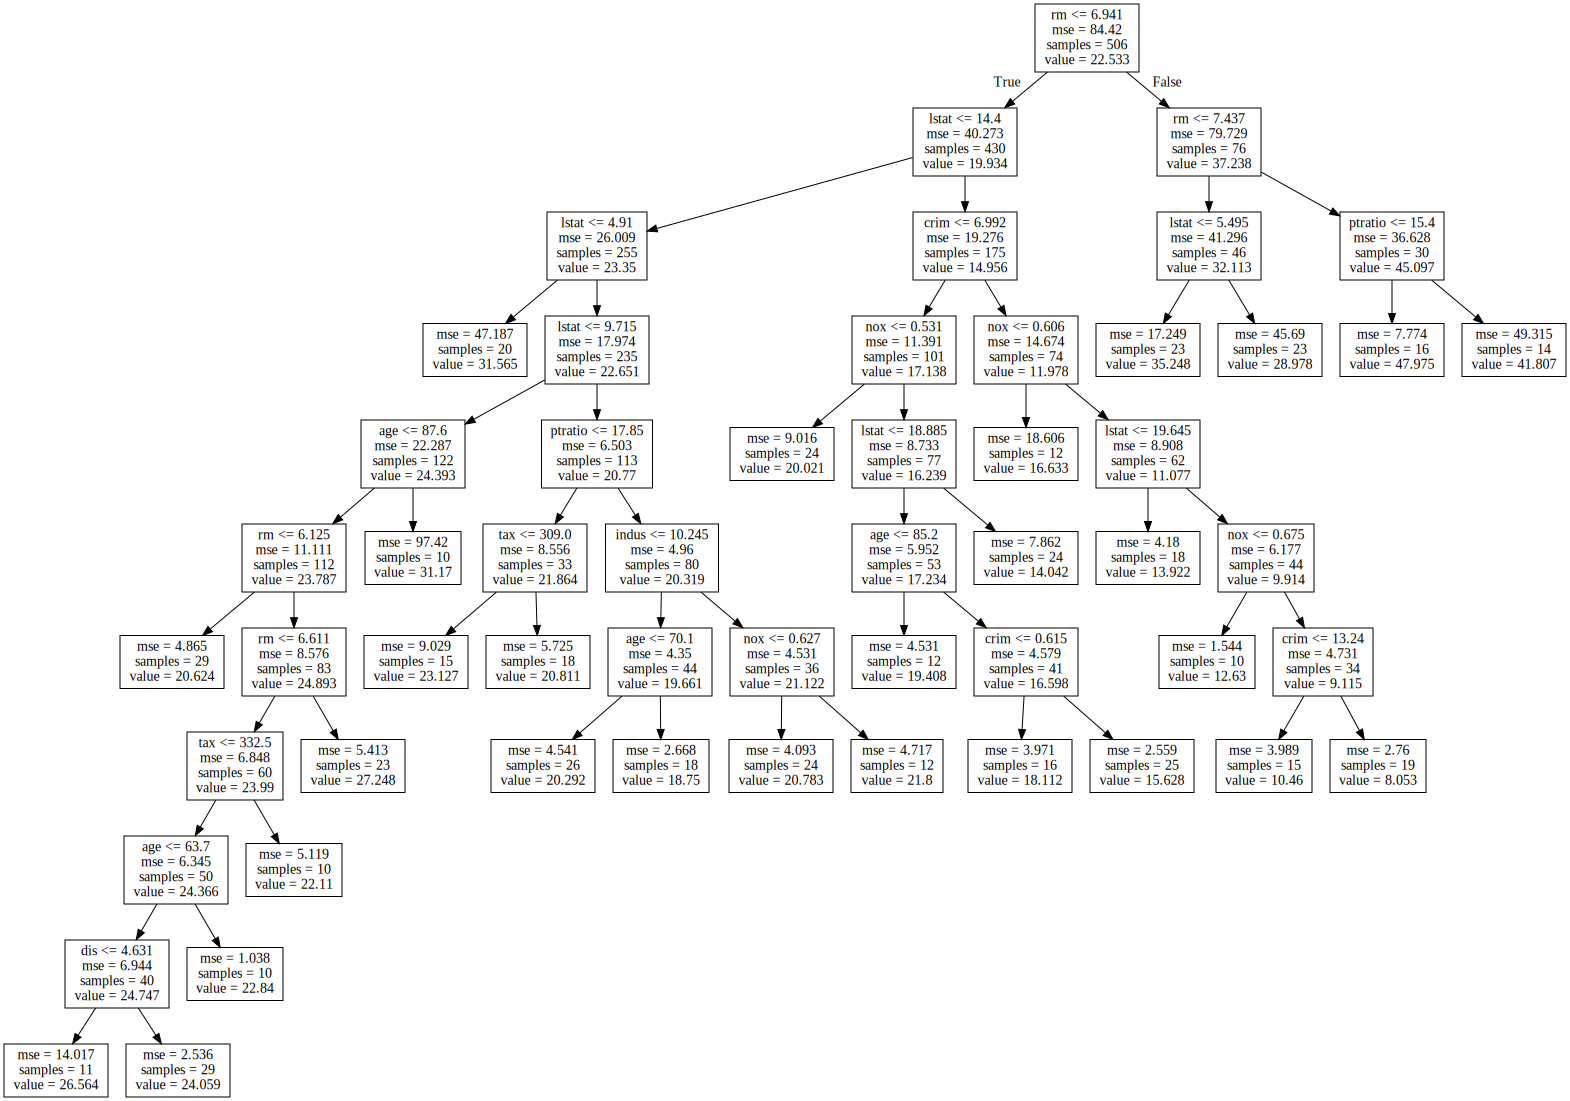

In [78]:
file = open(r'C:\Users\root\mlp\udemy\src\resources\boston\boston.dot', 'r')
text= file.read()
Source(text)


In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import numpy as np

In [88]:
mse= mean_squared_error=(data['preds'], data['medv'])
cv= KFold(n_splits=X.shape[0],  shuffle=True, random_state=1)

scores= cross_val_score(regtree, X,Y, scoring=mse,  cv=cv)


ValueError: For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. (0      22.840000
1      22.840000
2      35.247826
3      35.247826
4      35.247826
         ...    
501    22.840000
502    20.624138
503    28.978261
504    31.170000
505    20.624138
Name: preds, Length: 506, dtype: float64, 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64) was passed.

In [90]:

scores= cross_validate(regtree, X,Y, scoring=mse,  cv=cv)


ValueError: The list/tuple elements must be unique strings of predefined scorers. 

In [92]:
from sklearn.ensemble import RandomForestRegressor

## RANDOM FOREST
#### N_JOBS= Paralelización en computacion, tareas en paralelo (class o predict)
#### OOB_SCORE= Muestreo  aleatorio para obtener predicciones: TRUE, 
#### N:ESTIMATOS: NUMERO DE ARBOLES

In [117]:

forest=RandomForestRegressor(n_jobs=2,  oob_score=True, n_estimators=600)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
df['r_forest_pred']=forest.oob_prediction_
df[['r_forest_pred','medv']].head(4)

,r_forest_pred,medv
0,28.633945,24.0
1,22.342982,21.6
2,35.103349,34.7
3,34.848869,33.4


In [119]:
df['rforest_err_R2']=(df['r_forest_pred']-df['medv'])**2
R2=sum(df['rforest_err_R2'])/len(df)
R2

10.391106227343705

In [120]:
forest.oob_score_

0.8769111483111631

In [127]:
import pandas as pd 

df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])

out = pd.DataFrame(df.row.str.split(' ',2).tolist(),columns=['STD','City','State'])
out.drop(index=0,inplace=True)


df

,row
0,"STD, City State"
1,"33, Kolkata West Bengal"
2,"44, Chennai Tamil Nadu"
3,"40, Hyderabad Telengana"
4,"80, Bangalore Karnataka"
